# Notebook to examine the sensitivity of the Knapsack selection algorithm 



In [23]:
import json
from Utils import generate_summary_single, evaluate_summary
import h5py
import matplotlib.pyplot as plt
import numpy as np

Load up the outputs and scores of a model for reference. 
}

In [9]:
results = json.load(open('SensitivityExpt/Attention/F1/results.json'))
split_1_results = json.load(open('SensitivityExpt/Attention/F1/split_1_noname.json'))
outputs = json.load(open('SensitivityExpt/Attention/Output/outputs.json'))

In [32]:
data_h5 = h5py.File('Data/original/googlenet_tvsum.h5')

In [209]:
video_index = 'video_10'
user_summary = data_h5[video_index]['user_summary'][...]
shot_bounds = data_h5[video_index]['change_points'][...]
n_frames = data_h5[video_index]['n_frames'][...]
picks = data_h5[video_index]['picks'][...]
video_10_output = outputs[video_index]

In [210]:
split_1_results

{'video_10': 42.61182733463088,
 'video_13': 44.71481122648703,
 'video_16': 67.59112497710542,
 'video_18': 72.28140311316771,
 'video_2': 55.932017423138326,
 'video_21': 52.46886193170798,
 'video_22': 56.401454018263905,
 'video_23': 51.77100237453372,
 'video_33': 61.34286143078701,
 'video_46': 60.07267392925917}

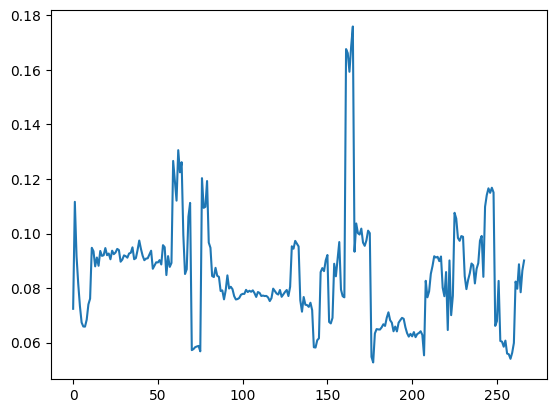

: 

In [211]:
plt.plot(video_10_output)

In [192]:
mean_imp= np.mean(video_10_output)
std_imp = np.std(video_10_output)


75.24256872972893


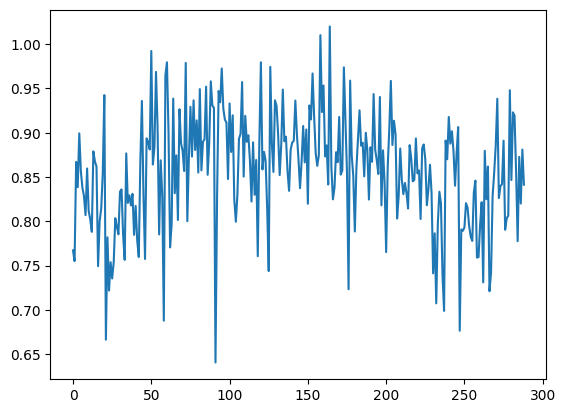

In [208]:
noise = np.random.normal(mean_imp,std_imp,size=len(video_10_output))
summary_scores = []
machine_sum = generate_summary_single(shot_bounds,video_10_output+noise,n_frames,picks)

print(evaluate_summary(machine_sum,user_summary,'tvsum'))
    
plt.plot(video_10_output+noise)

results = '